In [1]:
#Importing packages
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Extract Data

In [2]:
# Loading the CSV file into a DataFrame 
#Using 'ISO-8859-1' encoding, as the default encoder 'utf-8' results in a UnicodeDecodeError
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

#Displaying the first few rows of the DataFrame
print(df.head())

#Displaying shape of the data
print('\nShape of the data is:', df.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Shape of the data is: (541909, 8)


### Transforming Data

In [3]:
#Checking for missing values
print(df.isnull().sum())

#Filling or drop missing values
df = df.dropna() 

#Correcting data types if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int64')

#Creating a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print('\n', df.head())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4

### Loading Data

In [4]:
#Creating a SQLite database engine
engine = create_engine('sqlite:///ecommerce.db')

#Loading the DataFrame into the database
df.to_sql('customer_orders', engine, if_exists='replace', index=False)

print("Data loaded into SQLite database successfully.")


Data loaded into SQLite database successfully.


### Data Mining

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64


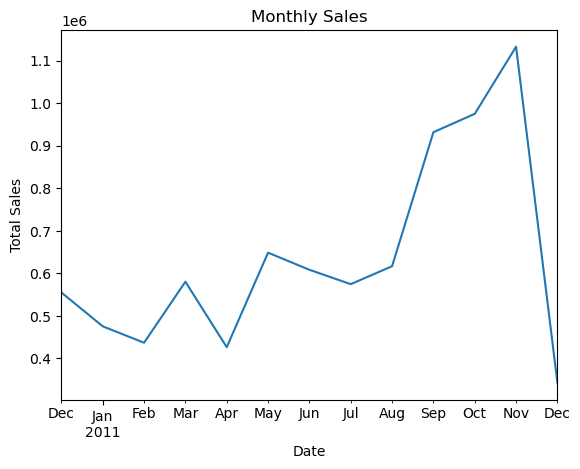

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalPrice, dtype: float64


In [5]:
#Summarizing sales
sales_summary = df['TotalPrice'].describe()
print(sales_summary)

#Plotting sales over time
df.set_index('InvoiceDate', inplace=True)
df['TotalPrice'].resample('M').sum().plot()
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#Identifying top customers
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_customers)